In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = 'E:/Ather_energy_code/app_logs - app_logs.csv'  # Replace with your file path
app_logs = pd.read_csv(file_path)

In [3]:
app_logs.head(10)

,timestamp,endpoint,user_id,response_time_ms,status_code
0,2024-12-01 23:20:31,/api/search,user_25,98,200
1,2024-12-01 23:25:31,/api/recommendations,user_82,107,200
2,2024-12-01 23:30:31,/api/chat,user_89,147,200
3,2024-12-01 23:35:31,/api/search,user_12,96,200
4,2024-12-01 23:40:31,/api/search,user_15,98,200
5,2024-12-01 23:45:31,/api/recommendations,user_59,105,200
6,2024-12-01 23:50:31,/api/chat,user_26,153,200
7,2024-12-01 23:55:31,/api/chat,user_26,181,200
8,2024-12-02 0:00:31,/api/search,user_47,72,200
9,2024-12-02 0:05:31,/api/user/profile,user_32,119,200


1. Performance Analysis

In [27]:
# Convert timestamp to datetime and extract hour
app_logs['timestamp'] = pd.to_datetime(app_logs['timestamp'])
app_logs['hour'] = app_logs['timestamp'].dt.hour

In [28]:
# Step 1: Calculate Average and P95 Response Times per Endpoint
def calculate_response_times(data):
    """Calculate average and P95 response times per endpoint."""
    grouped = data.groupby('endpoint')['response_time_ms']
    avg_response_time = grouped.mean()
    p95_response_time = grouped.quantile(0.95)
    return avg_response_time, p95_response_time

avg_response_time, p95_response_time = calculate_response_times(app_logs)

In [29]:
# Step 2: Calculate Error Rates
def calculate_error_rates(data):
    """Calculate error rates per endpoint."""
    data['is_error'] = data['status_code'].between(400, 599)
    error_rates = data.groupby('endpoint')['is_error'].mean() * 100
    return error_rates

error_rates = calculate_error_rates(app_logs)

In [30]:
# Step 3: Identify Peak Usage Periods
def calculate_peak_usage(data):
    """Identify peak usage periods."""
    peak_usage = data.groupby('hour').size()
    return peak_usage

peak_usage = calculate_peak_usage(app_logs)

In [31]:
# Step 4: Calculate Percentage of Slow Requests
def calculate_slow_requests(data, threshold_ms=1000):
    """Calculate the percentage of requests with response times greater than the threshold."""
    data['is_slow'] = data['response_time_ms'] > threshold_ms
    slow_requests_percentage = data.groupby('endpoint')['is_slow'].mean() * 100
    return slow_requests_percentage

slow_requests_percentage = calculate_slow_requests(app_logs)

In [32]:
# Step 5: Additional Metric - Total Requests per Endpoint
def calculate_request_counts(data):
    """Calculate total requests per endpoint."""
    request_counts = data['endpoint'].value_counts()
    return request_counts

request_counts = calculate_request_counts(app_logs)

In [33]:
# Display the Results
print("Average Response Time (ms):\n", avg_response_time)
print("\nP95 Response Time (ms):\n", p95_response_time)
print("\nError Rates (%):\n", error_rates)
print("\nPeak Usage Periods (Requests/Hour):\n", peak_usage)
print("\nPercentage of Slow Requests (> 1s):\n", slow_requests_percentage)
print("\nTotal Request Counts:\n", request_counts)

Average Response Time (ms):
 endpoint
/api/chat               445.026515
/api/recommendations    348.311871
/api/search             471.608081
/api/user/profile       410.600806
Name: response_time_ms, dtype: float64

P95 Response Time (ms):
 endpoint
/api/chat               235.65
/api/recommendations    155.20
/api/search             157.90
/api/user/profile       160.00
Name: response_time_ms, dtype: float64

Error Rates (%):
 endpoint
/api/chat               5.871212
/api/recommendations    6.639839
/api/search             6.868687
/api/user/profile       4.838710
Name: is_error, dtype: float64

Peak Usage Periods (Requests/Hour):
 hour
0     84
1     84
2     84
3     84
4     84
5     84
6     84
7     84
8     84
9     84
10    84
11    84
12    84
13    84
14    84
15    84
16    84
17    84
18    84
19    84
20    84
21    84
22    84
23    84
dtype: int64

Percentage of Slow Requests (> 1s):
 endpoint
/api/chat               0.946970
/api/recommendations    0.804829
/api/sear

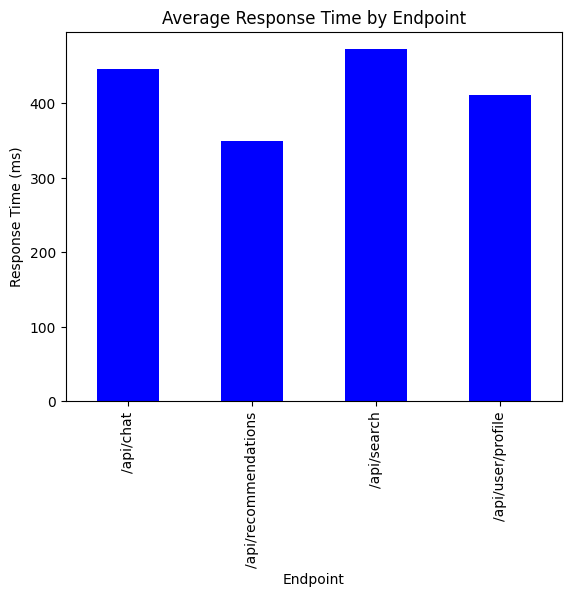

In [34]:
# Step 6: Visualize Metrics
# Average Response Time
avg_response_time.plot(kind='bar', title='Average Response Time by Endpoint', color='blue')
plt.xlabel('Endpoint')
plt.ylabel('Response Time (ms)')
plt.show()

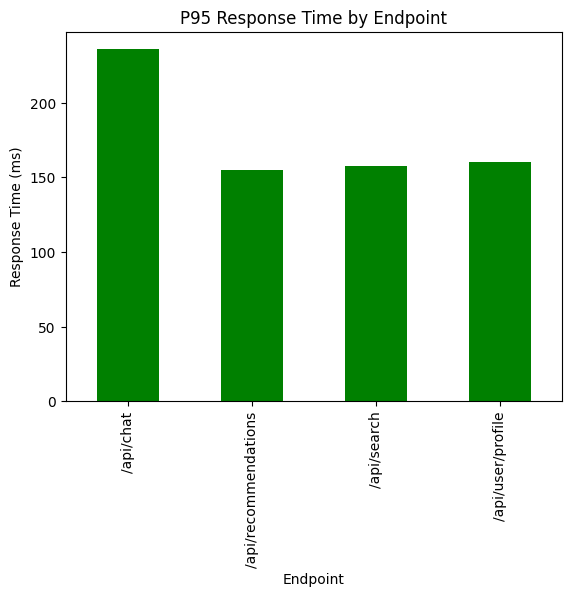

In [35]:
# P95 Response Time
p95_response_time.plot(kind='bar', title='P95 Response Time by Endpoint', color='green')
plt.xlabel('Endpoint')
plt.ylabel('Response Time (ms)')
plt.show()

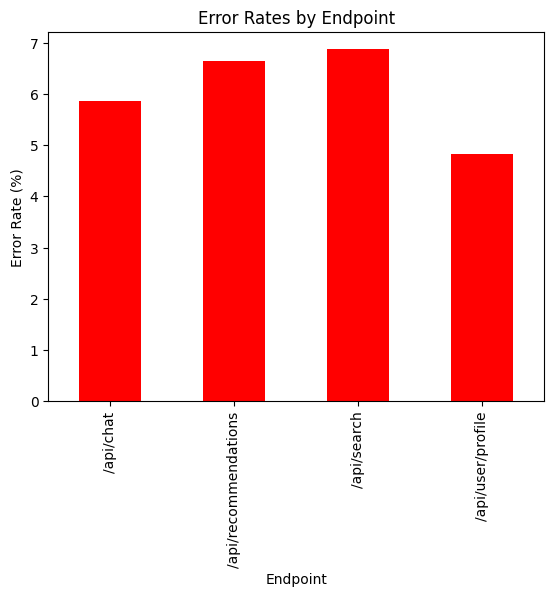

In [36]:
# Error Rates
error_rates.plot(kind='bar', color='red', title='Error Rates by Endpoint')
plt.xlabel('Endpoint')
plt.ylabel('Error Rate (%)')
plt.show()

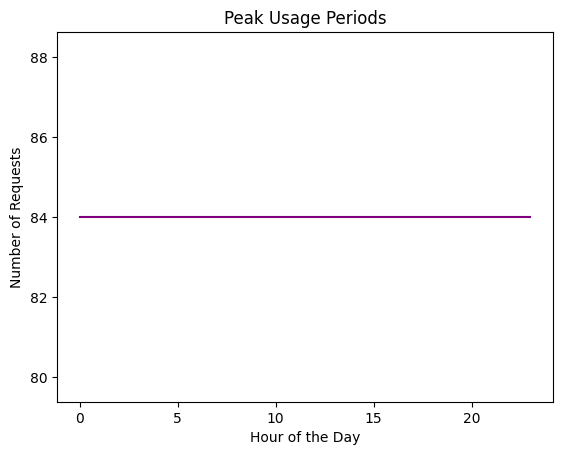

In [37]:
# Peak Usage Periods
peak_usage.plot(title='Peak Usage Periods', color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.show()

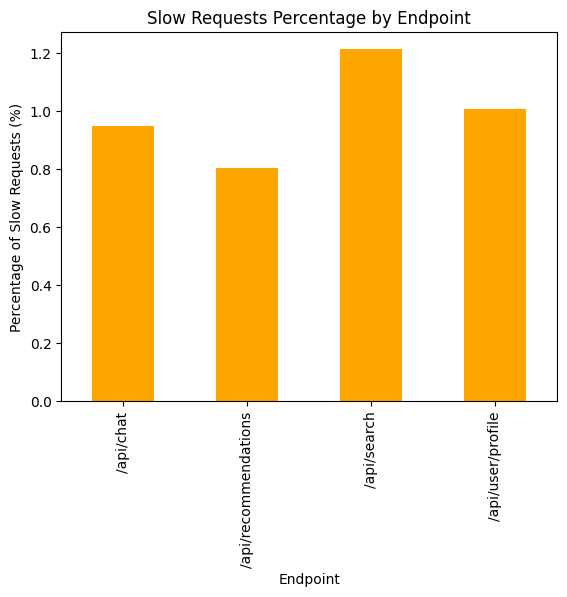

In [38]:
# Slow Requests Percentage
slow_requests_percentage.plot(kind='bar', title='Slow Requests Percentage by Endpoint', color='orange')
plt.xlabel('Endpoint')
plt.ylabel('Percentage of Slow Requests (%)')
plt.show()

Anomaly Detection

In [39]:
# Step 7: Anomaly Detection - Unusual Spikes in Response Time
def detect_response_time_anomalies(data):
    """Detect anomalies in response times."""
    grouped = data.groupby('endpoint')['response_time_ms']
    mean_response_time = grouped.mean()
    std_response_time = grouped.std()

    # Identify anomalies (response time > mean + 3 * std)
    anomalies = data[data['response_time_ms'] > 
                     data['endpoint'].map(mean_response_time + 3 * std_response_time)]
    return anomalies

In [40]:
response_time_anomalies = detect_response_time_anomalies(app_logs)
print("\nResponse Time Anomalies:\n", response_time_anomalies)


Response Time Anomalies:
                timestamp              endpoint  user_id  response_time_ms  \
33   2024-12-02 02:05:31     /api/user/profile  user_18             30000   
139  2024-12-02 10:55:31             /api/chat   user_6             30000   
142  2024-12-02 11:10:31  /api/recommendations  user_54             30000   
184  2024-12-02 14:40:31             /api/chat  user_88             30000   
219  2024-12-02 17:35:31           /api/search  user_40             30000   
360  2024-12-03 05:20:31  /api/recommendations  user_38             30000   
514  2024-12-03 18:10:31     /api/user/profile  user_53             30000   
744  2024-12-04 13:20:31           /api/search  user_82             30000   
863  2024-12-04 23:15:31     /api/user/profile  user_13             30000   
925  2024-12-05 04:25:31           /api/search  user_18             30000   
926  2024-12-05 04:30:31             /api/chat  user_67             30000   
1022 2024-12-05 12:30:31     /api/user/profile  u

In [41]:
# Step 8: Anomaly Detection - Error Rate Anomalies
def detect_error_rate_anomalies(data):
    """Detect anomalies in error rates."""
    data['is_error'] = data['status_code'].between(400, 599)
    hourly_error_rate = data.groupby(['hour', 'endpoint'])['is_error'].mean() * 100

    # Calculate mean and std of error rates
    mean_error_rate = hourly_error_rate.mean()
    std_error_rate = hourly_error_rate.std()

    # Identify anomalies (error rate > mean + 3 * std)
    anomalies = hourly_error_rate[hourly_error_rate > mean_error_rate + 3 * std_error_rate]
    return anomalies

error_rate_anomalies = detect_error_rate_anomalies(app_logs)
print("\nError Rate Anomalies:\n", error_rate_anomalies)


Error Rate Anomalies:
 hour  endpoint 
14    /api/chat    20.833333
18    /api/chat    21.052632
Name: is_error, dtype: float64


In [42]:
# Step 9: Anomaly Detection - Endpoint Availability Issues
def detect_endpoint_availability_issues(data):
    """Detect endpoints with significant availability issues (e.g., very few or no requests)."""
    endpoint_counts = data['endpoint'].value_counts()

    # Define a threshold for availability issues (e.g., < 5 requests)
    availability_issues = endpoint_counts[endpoint_counts < 5]
    return availability_issues

endpoint_availability_issues = detect_endpoint_availability_issues(app_logs)
print("\nEndpoint Availability Issues:\n", endpoint_availability_issues)


Endpoint Availability Issues:
 Series([], Name: count, dtype: int64)


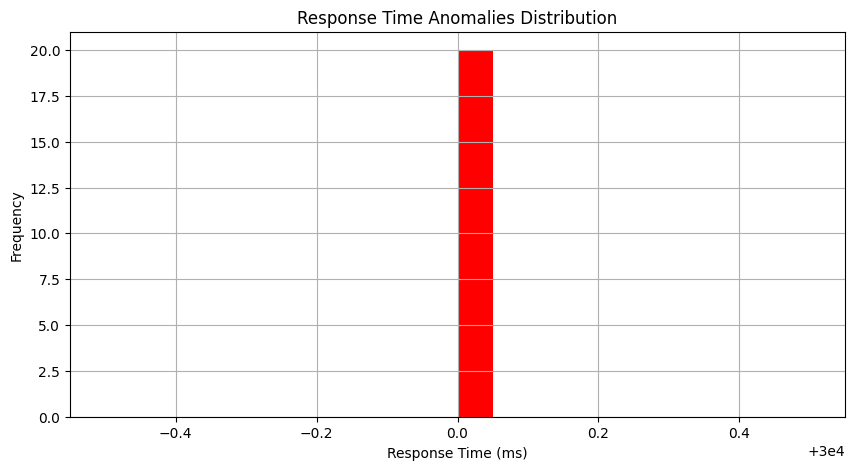

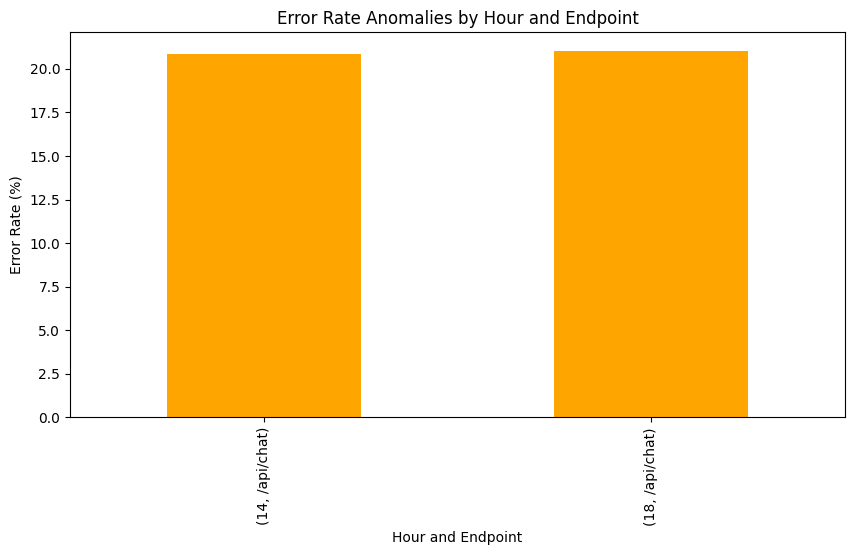

In [43]:
# Step 10: Visualizing Anomalies
def visualize_anomalies(response_anomalies, error_anomalies):
    """Visualize anomalies detected."""
    # Visualize Response Time Anomalies
    if not response_anomalies.empty:
        plt.figure(figsize=(10, 5))
        response_anomalies['response_time_ms'].hist(bins=20, color='red')
        plt.title('Response Time Anomalies Distribution')
        plt.xlabel('Response Time (ms)')
        plt.ylabel('Frequency')
        plt.show()

    # Visualize Error Rate Anomalies
    if not error_anomalies.empty:
        plt.figure(figsize=(10, 5))
        error_anomalies.plot(kind='bar', color='orange')
        plt.title('Error Rate Anomalies by Hour and Endpoint')
        plt.xlabel('Hour and Endpoint')
        plt.ylabel('Error Rate (%)')
        plt.show()

# Call the visualization function
visualize_anomalies(response_time_anomalies, error_rate_anomalies)